In [1]:
import liana as li
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scanpy as sc
import os
from pycrosstalker import tools as cttl
from pycrosstalker import plots as ctpl
import mudata as mu

In [2]:
data = mu.read_h5mu("../../../../data_vt3/second/nichesphere/2306_HMI_allmodalities.h5mu")

/project/.pixi/envs/default/lib/python3.10/site-packages/mudata/_core/mudata.py:1598: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
/project/.pixi/envs/default/lib/python3.10/site-packages/mudata/_core/mudata.py:963: UserWarning: Cannot join columns with the same name because var_names are intersecting.
/project/.pixi/envs/default/lib/python3.10/site-packages/mudata/_core/mudata.py:1461: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.


In [3]:
data = data.mod['sc']

In [4]:
data

AnnData object with n_obs × n_vars = 48547 × 27416
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'percent_mt', 'doublet_score', 'doublet', 'dissociation_s1', 'opt_clust', 'patient', 'batch', 'opt_clust_integrated', 'cell_type', 'ident', 'nFeaturess_RNA', 'cell_subtype2', 'patient_region_id', 'sampleType'
    var: 'n_counts'
    obsm: 'X_harmony', 'X_pca', 'X_umap_harmony'

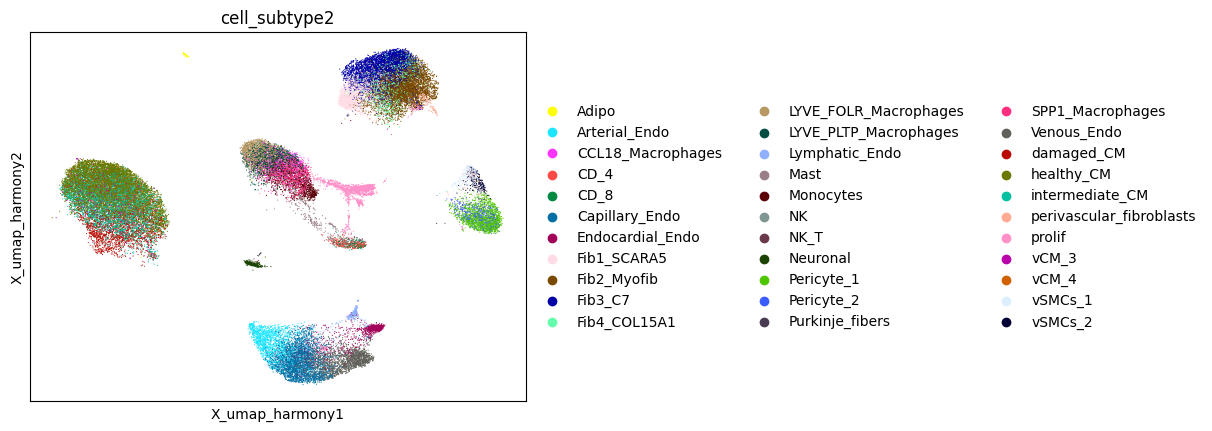

In [5]:
sc.pl.embedding(data,basis='X_umap_harmony',color='cell_subtype2')

In [6]:
for i in set(data.obs['sampleType']):
    print(i)
    lr=li.method.cellphonedb(data[data.obs['sampleType']==i],
                        groupby='cell_subtype2',
                        expr_prop=0.5,
                        verbose=True,
                        resource_name='consensus',inplace=False,use_raw=False)
    lr.to_csv(f"{i}_lr_liana_consensus.csv")

for i in os.listdir("./"):
    if i.endswith('lr_liana_consensus.csv'):
        evfull = pd.read_csv(i)
        evfull = evfull.loc[:,['ligand','receptor_complex','source','target','lr_means','cellphone_pvals']]
        evfull['type_gene_A'] = 'Ligand'
        evfull['type_gene_B'] = 'Receptor'
        evfull['gene_A'] = evfull['ligand']
        evfull['gene_B'] = evfull['receptor_complex']
        evfull['MeanLR'] = evfull['lr_means']
        k = i[0:i.find('_lr_')]
        evfull = evfull.loc[list(evfull.cellphone_pvals.to_numpy()<=0.001),:]
        evfull = evfull.loc[:, ['source', 'target', 'type_gene_A', 'type_gene_B', 'gene_A', 'gene_B', 'MeanLR']].to_csv(f'{k}_lr_ready.csv')

Using resource `consensus`.


Using `.X`!


ischemic


Converting to sparse csr matrix!
/project/.pixi/envs/default/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
6925 features of mat are empty, they will be removed.
/project/.pixi/envs/default/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/project/.pixi/envs/default/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.29 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 16776 samples and 1241 features


100%|██████████| 1000/1000 [00:12<00:00, 79.39it/s]
Using resource `consensus`.
Using `.X`!


myogenic


Converting to sparse csr matrix!
/project/.pixi/envs/default/lib/python3.10/site-packages/anndata/_core/anndata.py:381: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
838 features of mat are empty, they will be removed.
/project/.pixi/envs/default/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/project/.pixi/envs/default/lib/python3.10/site-packages/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.17 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 31771 samples and 1495 features


100%|██████████| 1000/1000 [00:32<00:00, 30.36it/s]


In [7]:
paths = {
    'CTR': "myogenic_lr_ready.csv",
    'EXP': "ischemic_lr_ready.csv"
}
output = "output/"
if not os.path.isdir(output):
    os.mkdir(output)
data = cttl.analise_LR(paths, out_path=output, org="hsa")

Create a Differential Table
Calculating CCI Ranking
Calculating GCI Ranking
Network Analysis Done


In [8]:
paths.keys()

dict_keys(['CTR', 'EXP'])

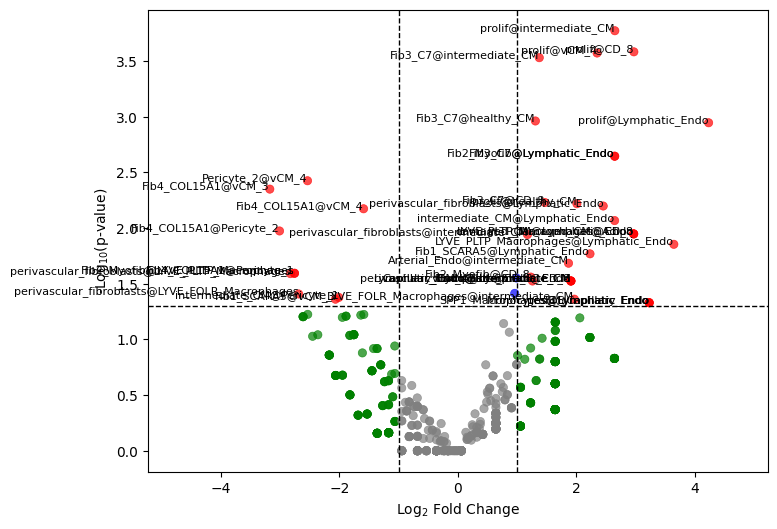

In [10]:
ctpl.plot_volcane(data['stats']['EXP_x_CTR'], method = "fisher")

/project/.pixi/envs/default/lib/python3.10/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
/project/.pixi/envs/default/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:707: RuntimeWarning: invalid value encountered in sqrt


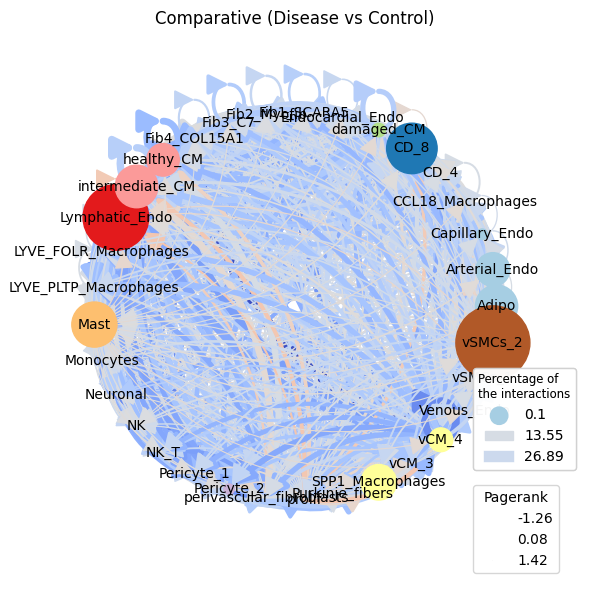

In [11]:
ctpl.plot.plot_cci(graph=data["graphs"]["EXP_x_CTR"],
         colors=data["colors"],
         plt_name='Comparative (Disease vs Control)',
         coords=data["coords"],
         emax= None,
         leg= False,
         low= 0,
         high= 0,
         ignore_alpha= False,
         log= False,
         efactor= 8,
         vfactor= 12,
         pg= data["rankings"]["EXP_x_CTR"]["Pagerank"]
         )